# **CLASSIFICATION PROBLEM (SKLEARN APPLIED ON PROJECT DATA)**

### **LOGISTIC REGRESSION**

We will apply logistic regression from sklearn to the project data to classify data into the two classes.

In [1]:
# read in the project data (train and test)
# read train data

# read test data

# display shape of train data

# display shape of test data


In [2]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [3]:
# load the dataset
train_data = pd.read_csv('train_data.txt', header = None) 
test_data = pd.read_csv('test_data.txt', header = None) 
train_data = train_data.copy()
test_data = test_data.copy()

In [4]:
# print total number of Observations 
print(f'Imaginary class data contains {train_data.shape[0]} observations and {train_data.shape[1]} features (columns).')

Imaginary class data contains 338 observations and 13 features (columns).


In [5]:
print(f'Imaginary class data contains {test_data.shape[0]} observations and {test_data.shape[1]} features (columns).')

Imaginary class data contains 231 observations and 13 features (columns).


In [6]:
#train_data

In [7]:
# display 5 rows in train
train_data.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0,0.521037,0.022658,0.545989,0.364042,0.680010,0.792037,0.703140,0.731113,0.668446,0.605518,0.355260,1
1,1,0.643144,0.272574,0.615783,0.502017,0.270471,0.181768,0.203608,0.348757,0.344367,0.141323,0.155274,1
2,2,0.601496,0.390260,0.595743,0.449798,0.572941,0.431017,0.462512,0.635686,0.481580,0.211247,0.228560,1
3,3,0.210090,0.360839,0.233501,0.102993,0.973233,0.811361,0.565604,0.522863,0.763481,1.000000,0.137905,1
4,4,0.629893,0.156578,0.630986,0.489705,0.459788,0.347893,0.463918,0.518390,0.342766,0.186816,0.232766,1


In [8]:
# display 5 rows in train
train_data[4:9]

,0,1,2,3,4,5,6,7,8,9,10,11,12
4,4,0.629893,0.156578,0.630986,0.489705,0.459788,0.347893,0.463918,0.518390,0.342766,0.186816,0.232766,1
5,5,0.258839,0.202570,0.267984,0.141626,0.794379,0.461996,0.369728,0.402038,0.491191,0.551179,0.079487,1
6,6,0.533343,0.347311,0.523875,0.380599,0.390802,0.274891,0.264058,0.367793,0.334757,0.157119,0.120173,1
7,7,0.318472,0.376057,0.320710,0.184419,0.686093,0.445126,0.219447,0.297465,0.549386,0.517060,0.169779,1
8,8,0.284869,0.409537,0.302052,0.159754,0.788295,0.533157,0.435567,0.464861,0.631607,0.504002,0.069261,1


In [9]:
# remove the first column  named 0 in both train and test data and overwrite the data
train_data.drop(columns = [0], axis = 1, inplace = True)
test_data.drop(columns = [0], axis = 1, inplace = True)


In [10]:
# assign the following names to the columns of both the train and test data
column_names =  ['Group1','Group2','Group3','Group4','Group5','Group6','Group7','Group8','Group9','Group10','Group11','Class']
train_data.rename(columns = {i : j for i,j in zip(range(1,13), column_names)}, inplace=True)
#test_data.rename(columns = column_names, inplace=True)
test_data.rename(columns = {i : j for i,j in zip(range(1,13), column_names)}, inplace=True)


In [11]:
# verify that names have been properly assigned by displaying first 5 rows of test data
train_data.head()

,Group1,Group2,Group3,Group4,Group5,Group6,Group7,Group8,Group9,Group10,Group11,Class
0,0.521037,0.022658,0.545989,0.364042,0.680010,0.792037,0.703140,0.731113,0.668446,0.605518,0.355260,1
1,0.643144,0.272574,0.615783,0.502017,0.270471,0.181768,0.203608,0.348757,0.344367,0.141323,0.155274,1
2,0.601496,0.390260,0.595743,0.449798,0.572941,0.431017,0.462512,0.635686,0.481580,0.211247,0.228560,1
3,0.210090,0.360839,0.233501,0.102993,0.973233,0.811361,0.565604,0.522863,0.763481,1.000000,0.137905,1
4,0.629893,0.156578,0.630986,0.489705,0.459788,0.347893,0.463918,0.518390,0.342766,0.186816,0.232766,1


In [12]:
# perform some data explorations on the train data
# separate column data types
categorical_features = train_data.select_dtypes('O').columns
continuous_features = train_data.select_dtypes('float').columns

In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Group1   338 non-null    float64
 1   Group2   338 non-null    float64
 2   Group3   338 non-null    float64
 3   Group4   338 non-null    float64
 4   Group5   338 non-null    float64
 5   Group6   338 non-null    float64
 6   Group7   338 non-null    float64
 7   Group8   338 non-null    float64
 8   Group9   338 non-null    float64
 9   Group10  338 non-null    float64
 10  Group11  338 non-null    float64
 11  Class    338 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 31.8 KB


In [14]:
train_data.describe()

,Group1,Group2,Group3,Group4,Group5,Group6,Group7,Group8,Group9,Group10,Group11,Class
count,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000
mean,0.348802,0.318131,0.343878,0.225567,0.424975,0.271552,0.223771,0.260393,0.358397,0.271768,0.113573,1.538462
std,0.166452,0.142584,0.167695,0.148306,0.169338,0.172009,0.193436,0.195703,0.155775,0.155212,0.102494,0.499258
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.230087,0.210179,0.223447,0.122617,0.305177,0.144217,0.071521,0.104386,0.251468,0.162332,0.044865,1.000000
50%,0.312083,0.310619,0.301914,0.179474,0.421097,0.240108,0.169025,0.197440,0.345702,0.239153,0.080067,2.000000
75%,0.446377,0.402012,0.451835,0.292029,0.534919,0.353874,0.330131,0.395253,0.426989,0.343355,0.148829,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [15]:
train_data.isnull().sum() # number of missing values

Group1     0
Group2     0
Group3     0
Group4     0
Group5     0
Group6     0
Group7     0
Group8     0
Group9     0
Group10    0
Group11    0
Class      0
dtype: int64

In [16]:
continuous_features

Index(['Group1', 'Group2', 'Group3', 'Group4', 'Group5', 'Group6', 'Group7',
       'Group8', 'Group9', 'Group10', 'Group11'],
      dtype='object')

In [17]:
# pandas-profiling can help us with all the summary of the data
from pandas_profiling import profile_report
data_report = train_data.profile_report()
data_report.to_file('train_data.html')

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [18]:
# count plot for the continuous features
def cont_feat_distplot(data,list_of_col,figsize = (35,7)):
    fig = plt.figure(figsize=figsize)
    for i,col in enumerate(list_of_col):
        plt.subplot(1,11,i+1)
        sb.distplot(data[col])
        plt.xlabel(col)
        plt.ylabel('Freq')
#         plt.title(f'Distribution Plot of {col.capitalize()}')
        i += 1
    plt.show()  

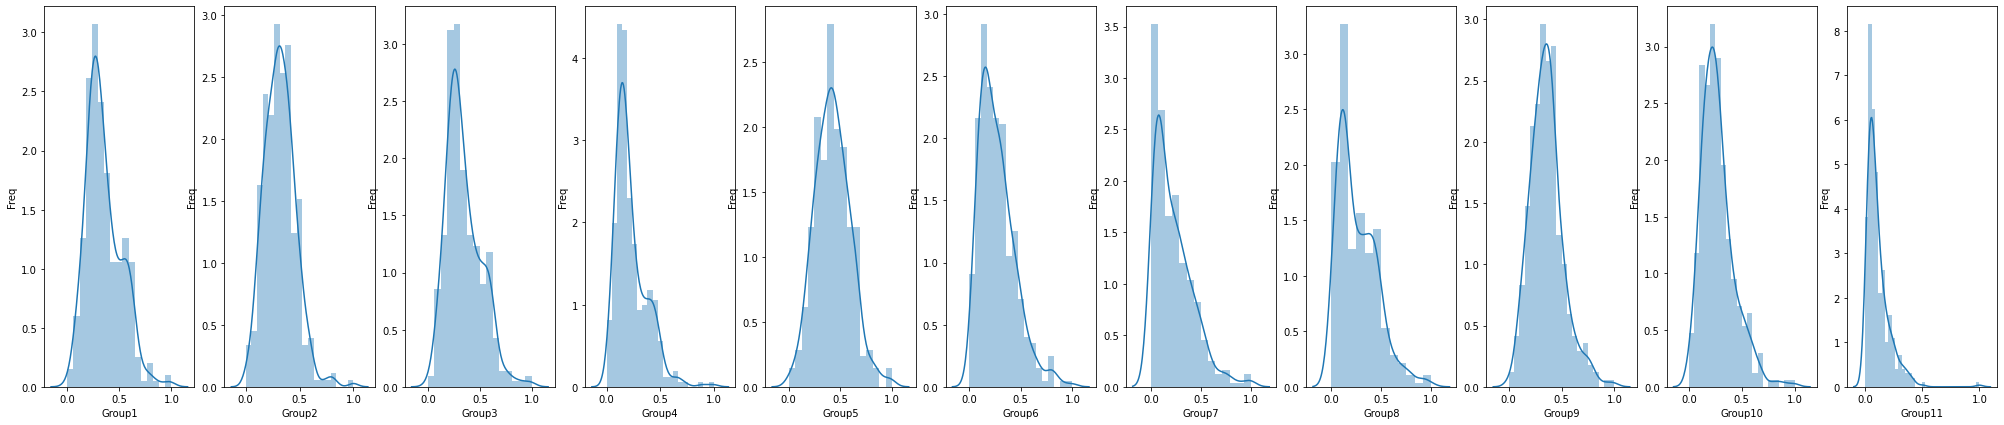

In [19]:
cont_feat_distplot(train_data,continuous_features)

In [20]:
# # count plot for the continuous features
# def cont_feat_distplot(data,list_of_col,figsize = (35,7)):
#     fig = plt.figure(figsize=figsize)
#     for i,col in enumerate(list_of_col):
#         plt.subplot(1,4,i+1)
#         plt.hist(data[col])
#         plt.xlabel(col)
#         plt.ylabel('Freq')
#         plt.title(f'Distribution Plot of {col.capitalize()}')
#         i += 1
#     plt.show()  
# cont_feat_distplot(train_data,continuous_features)

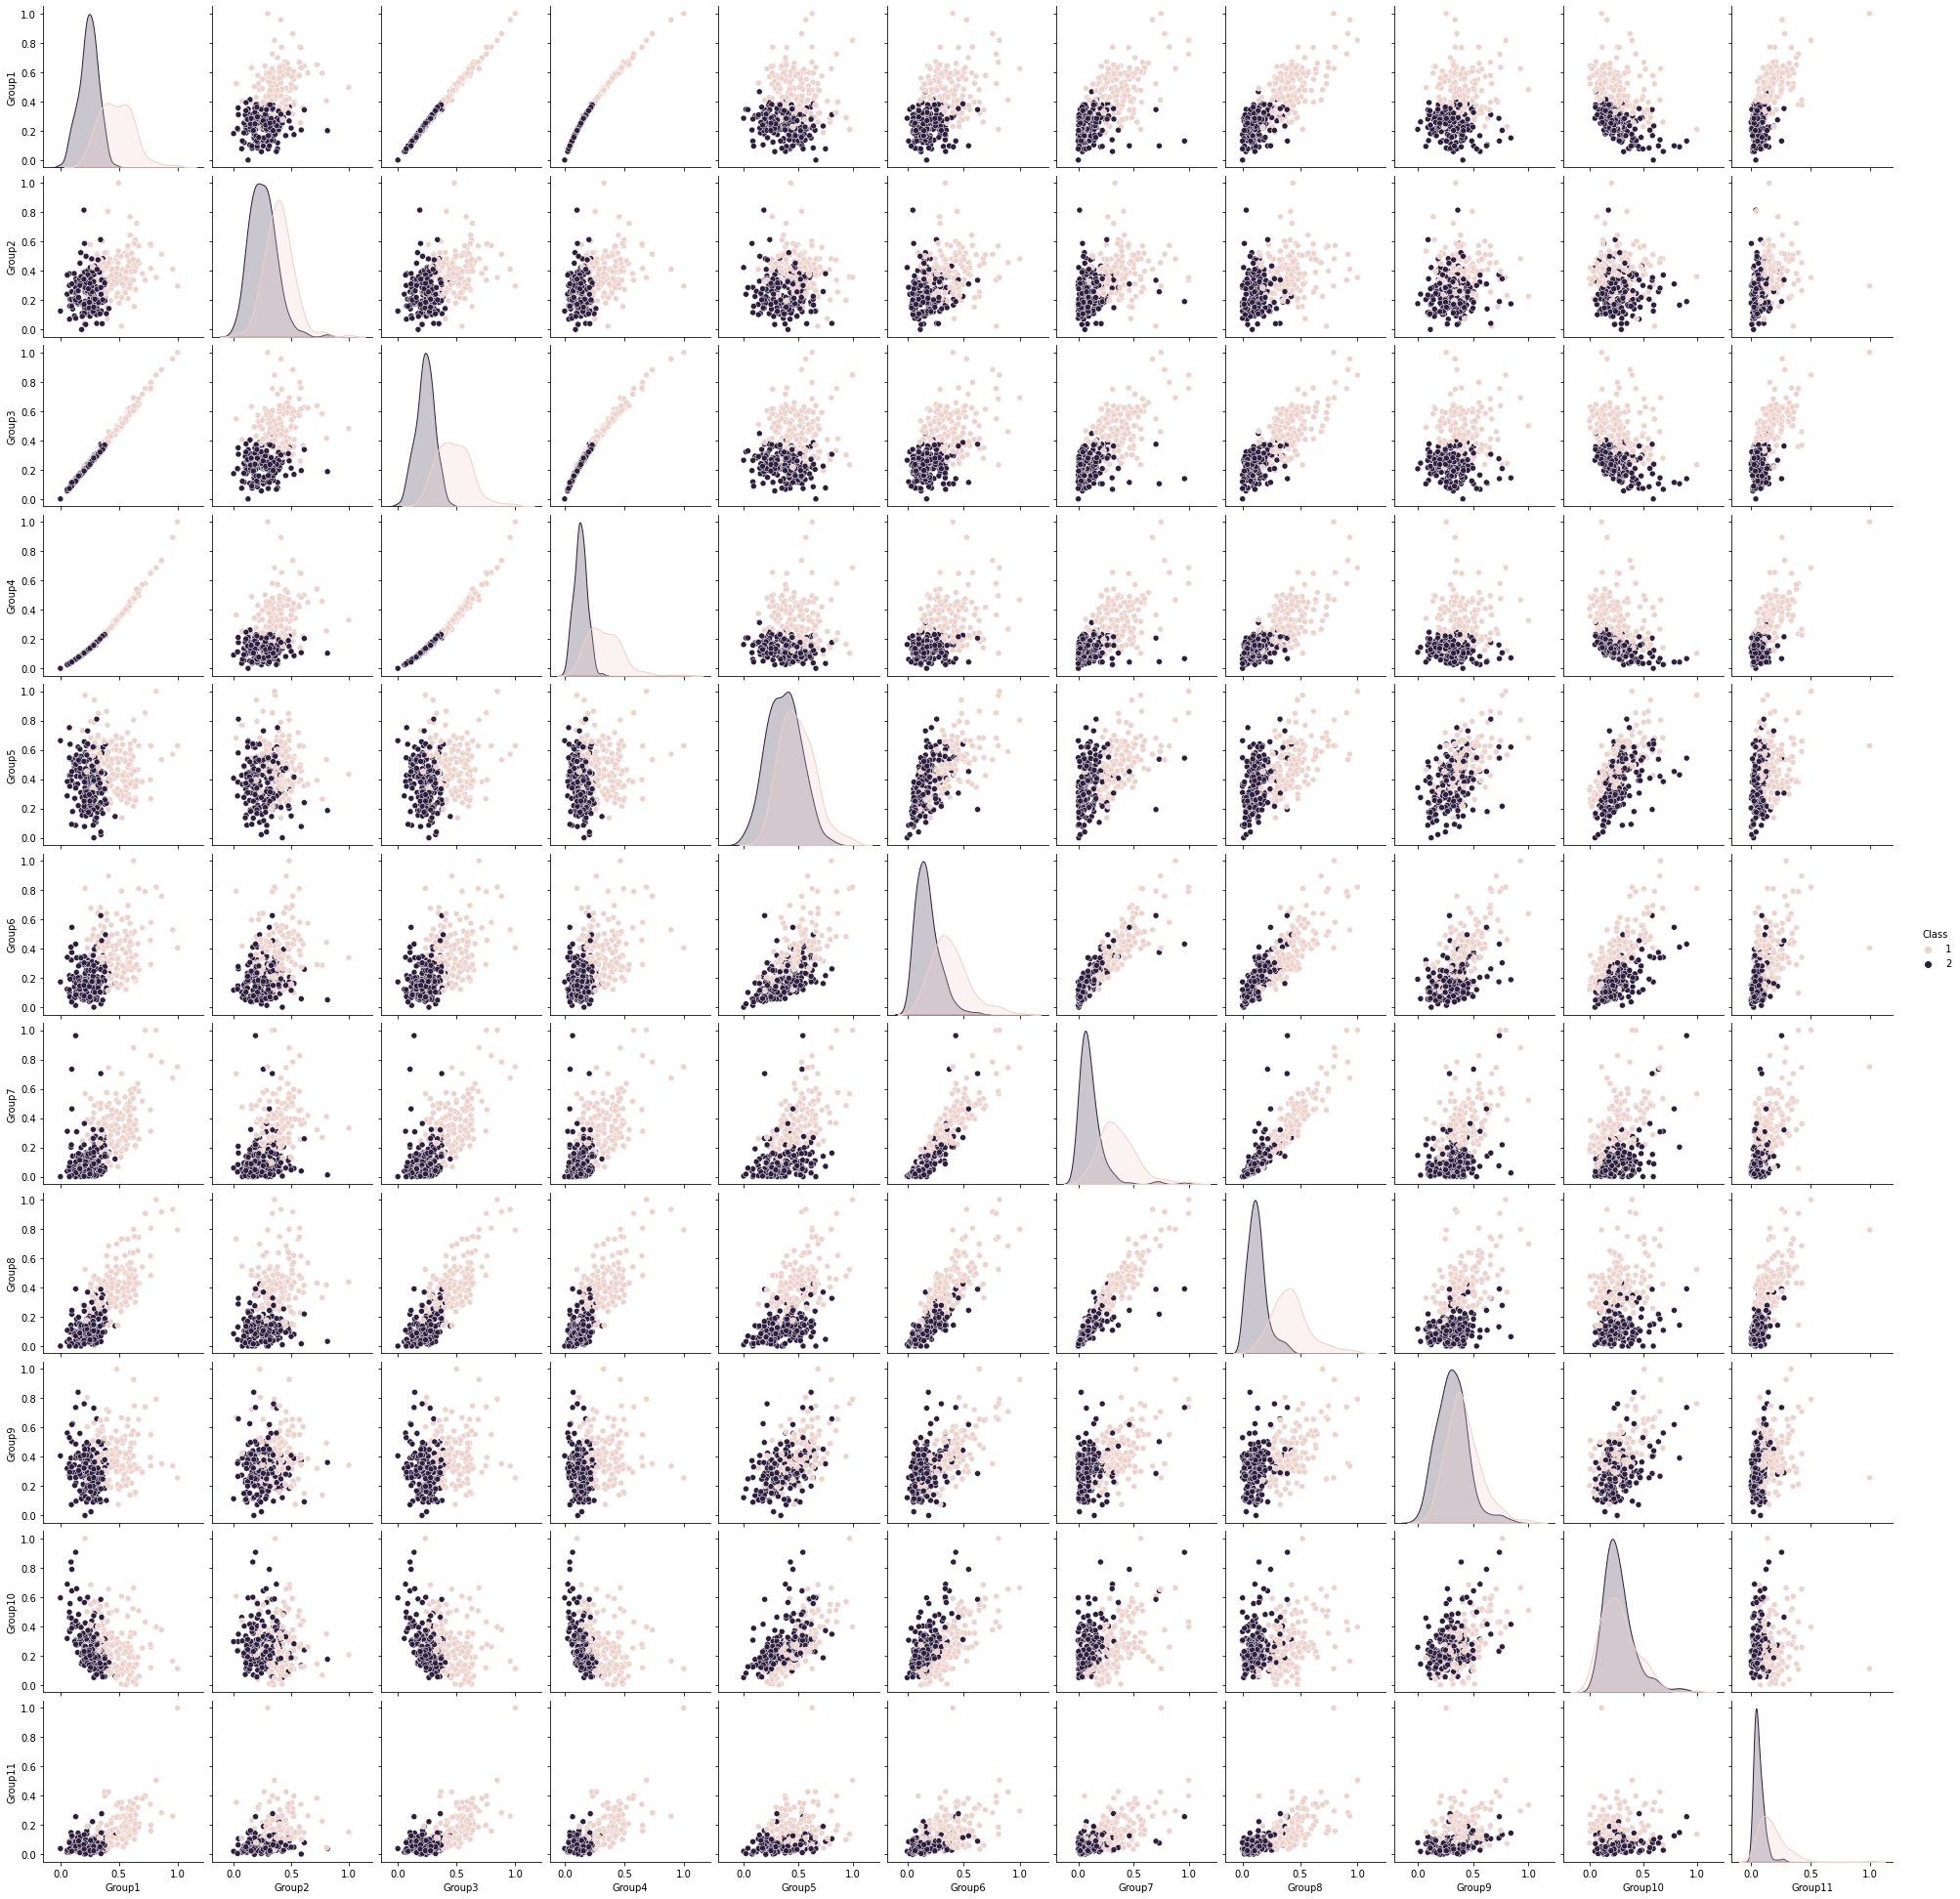

In [21]:
sb.pairplot(train_data,hue = 'Class')

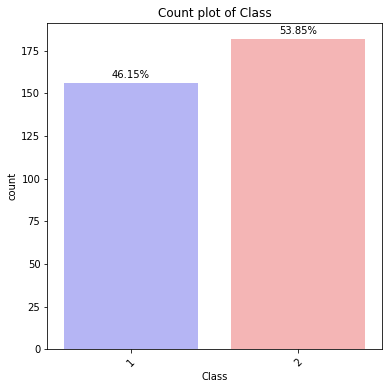

In [22]:
# visualize the distribution of target in the train data
plt.figure(figsize=(6,6))
total = float(len(train_data))
ax = sb.countplot(train_data['Class'],palette='bwr')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:.2f}%'.format((height/total)*100),ha="center") 
plt.xticks(rotation=45)
t = plt.title("Count plot of Class")

In [23]:
# separate train data into features and target
train_data_feature = train_data.drop(columns = ['Class'], axis = 1)
train_data_target=train_data['Class']
print(f"train_data_feature:{train_data_feature.shape}")
print(f"train_data_target:{train_data_target.shape}")

# separate test data into features and target as well
test_data_feature = test_data.drop(columns = ['Class'], axis = 1)
test_data_target=test_data['Class']
print(f"test_data_feature:{test_data_feature.shape}")
print(f"test_data_target:{test_data_target.shape}")


train_data_feature:(338, 11)
train_data_target:(338,)
test_data_feature:(231, 11)
test_data_target:(231,)


In [24]:
# import logistic module
from sklearn.linear_model import LogisticRegression

In [25]:
# instantiate model
logistic_model=LogisticRegression()
# train model by fitting
logistic_model.fit(train_data_feature,train_data_target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
# make predictions
log_predictions = logistic_model.predict(test_data_feature)
# display all the predictions made
log_predictions

array([2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2,
       2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2,
       1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2,
       1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1,
       1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2])

In [27]:
# evaluate logistic mode performance
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [28]:
print(f'accuracy_score: {accuracy_score(test_data_target,log_predictions)}')
print(f'precision_score: {precision_score(test_data_target,log_predictions)}')
print(f'recall_score: {recall_score(test_data_target,log_predictions)}')
print(f'f1_score: {f1_score(test_data_target,log_predictions)}')

accuracy_score: 0.9047619047619048
precision_score: 0.717948717948718
recall_score: 1.0
f1_score: 0.835820895522388


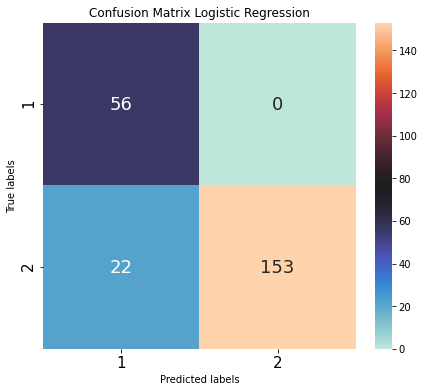

+=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=+
+=++=++=++=+ Classification Report Project Data +=++=+
+=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=+
              precision    recall  f1-score   support

           1       0.72      1.00      0.84        56
           2       1.00      0.87      0.93       175

    accuracy                           0.90       231
   macro avg       0.86      0.94      0.88       231
weighted avg       0.93      0.90      0.91       231



In [29]:
# confusion matrix
target_names = ['1','2']
conf_mat = confusion_matrix(test_data_target,log_predictions)
f,ax= plt.subplots(1,1,figsize=(7,6))
sb.heatmap(conf_mat,annot=True,fmt='.0f',cmap='icefire', ax = ax,annot_kws={"size":18})
ax.set_xticklabels(target_names,fontsize = 15)
ax.set_yticklabels(target_names,fontsize = 15)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix Logistic Regression');
plt.show()

print('+=+'*18)
print('+=++=++=++=+ Classification Report Project Data'+' '+'+=++=+')
print('+=+'*18)
print(classification_report(test_data_target, log_predictions,target_names=target_names))

- **Confusion Matrix:** a table showing correct predictions and types of incorrect predictions.

- **Precision:** the number of true positives divided by all positive predictions. Precision is also called Positive Predictive Value. It is a measure of a classifier’s exactness. Low precision indicates a high number of false positives.

- **Recall:** the number of true positives divided by the number of positive values in the test data. Recall is also called Sensitivity or the True Positive Rate. It is a measure of a classifier’s completeness. Low recall indicates a high number of false negatives.

- **F1 Score:** the weighted average of precision and recall.

**We can improve the above model by applying the concept of hyperparameter tuning.**

**HYPERPARAMETERS**

Hyperparameters are tuning measures that are specified for a model before training. Each type of model has its own unique set of hyperparameters. 

Oftentimes, the base function has defaults for these hyperparameters when they are not specified. So, it is always important to check the documentation on each model to know the complete list of hyperparameters that can be tuned.

Now that we know the corresponding hyperparameters to tune for our model, the problem now is, how do we combine these hyperparameters to know which combination will give us the best performance for our data?

**RESPONSE**

There is a super easy way to do this using three functions in scikit-learn.

* GridSearchCV

* RandomizedSearchCV

* Pipeline (feeds list of diff models and their hyperparameters to a grid or randomized search)



**GridSearchCV**

In [250]:
# Let's use use gridsearch to finetune our linear regression model
import numpy as np
from sklearn.model_selection import learning_curve,GridSearchCV
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

# create list of candidate penalty hyperparameters
penalty = ['l1','l2']

# create range of candidate regularization hyperparameters
C = np.logspace(0,4,10)

# create a dictionary hyperparameter candidates
hyperparameters = dict(C=C, penalty=penalty)

# create a grid search object and pass in the hyperparameters defined
gridsearch = GridSearchCV(model, hyperparameters, cv=5,verbose=1)

# fitting the data to the grid for searching
bestmodel = gridsearch.fit(train_data_feature,train_data_target)

# let's see the best hyperparameter values for the best model
print(bestmodel.best_estimator_.get_params())
print('')
# mean accuracy for the best model
print(bestmodel.score(train_data_feature,train_data_target))

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'C': 2.7825594022071245, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

0.9437869822485208


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished


**RandomizedSearchCV**

In [252]:
# Let's use use gridsearch to finetune our logistic regression model
import numpy as np
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV

model = LogisticRegression()

# create list of candidate penalty hyperparameters
penalty = ['l1','l2']

# create range of candidate regularization hyperparameters
C = uniform(0,4)

# create a dictionary hyperparameter candidates
hyperparameters = dict(C=C, penalty=penalty)

# create a grid search object and pass in the hyperparameters defined
randomzedsearch = RandomizedSearchCV(model, hyperparameters, cv=5,verbose=1,n_iter=100,random_state=1)

# fitting the data to the grid for searching
bestmodel1 = randomzedsearch.fit(train_data_feature,train_data_target)

# let's see the best hyperparameter values for the best model
print(bestmodel1.best_estimator_.get_params())

# mean accuracy for the best model
print(bestmodel1.score(train_data_feature,train_data_target))

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'C': 1.828819231947953, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
0.9437869822485208


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.5s finished


# **RESOURCE MATERIALS FOR FURTHER READING**

* MIT Free Online Course on **[INTRODUCTION TO MACHINE LEARNING](https://openlearninglibrary.mit.edu/courses/course-v1:MITx+6.036+1T2019/course/)**.

* Free Course by Google Developers **[MACHINE LEARN CRASH](https://developers.google.com/machine-learning/crash-course).**

# **ASSIGNMENT**:

* Please answer the under-listed questions using an overleaf template (please visit this [link](https://www.overleaf.com/learn/how-to/Creating_a_document_in_Overleaf) for a brief tutorial on how to create a document with overleaf).**

* You are reminded that all these questions can be obtained from this [website](https://www.mygreatlearning.com/blog/machine-learning-interview-questions/). You can reference it as a guide, but do not attempt to copy anything from there. Failure to comply with this will result in severe consequences.**

* **Each question carries a single point i.e. 4 points...Total Score: 100 points**

***
***

### **ANSWER AS MANY AS YOU CAN**

***
***

1. What is the main key difference between supervised and unsupervised machine learning?

2. What is Linear Regression?

3. List all assumptions for data to be met before starting with linear regression.

4. Differentiate between regression and classification.

5. Explain the difference between Normalization and Standardization.

6. Why is logistic regression a type of classification technique and not a regression? Name the function it is derived from? 

7. Explain the phrase “Curse of Dimensionality”.

8. What’s a Fourier transform?

9. What is a confusion matrix and why do you need it?

10. What is the Principle Component Analysis?

11. What is the difference between regularization and normalisation? 

12. List the most popular distribution curves along with scenarios where you will use them in an algorithm.

13. Can you mention some advantages and disadvantages of decision trees?

14. What is the exploding gradient problem while using back propagation technique?

15. What is the difference between stochastic gradient descent (SGD) and gradient descent (GD)?

16. When does regularization come into play in Machine Learning?

17. What is overfitting?

18. Explain One-hot encoding and Label Encoding. How do they affect the dimensionality of the given dataset?

19. There are many machine learning algorithms till now. If given a data set, how can one determine which algorithm to be used for that?

20. How do you select important variables while working on a data set? 

21. What is the difference between deep learning and machine learning?

22. What are the different types of Learning/ Training models in ML?

23. Explain the terms Artificial Intelligence (AI), Machine Learning (ML and Deep Learning?

24. How are covariance and correlation different from one another?

25. State the differences between causality and correlation?